![blood-sugar-101](blood-sugar-101.jpg)


# What do your blood sugars tell you?

## 📖 Background

Diabetes mellitus remains a global health issue, causing several thousand people to die each day from this single condition. Finding and avoiding diabetes in the earlier stages can help reduce the risk of serious health issues such as circulatory system diseases, kidney malfunction, and vision loss. This competition involves developing a predictive model for effectively detecting potential Diabetes cases, ideally, before commencing preventive treatment.


## 💾 The data

The dataset contains diagnostic measurements that are associated with diabetes, which were collected from a population of Pima Indian women. The data includes various medical and demographic attributes, making it a well-rounded resource for predictive modeling.

The columns and Data Types are as follows:

- Pregnancies
Type: Numerical (Continuous)
Description: Number of times the patient has been pregnant.

- Glucose
Type: Numerical (Continuous)
Description: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.

- BloodPressure
Type: Numerical (Continuous)
Description: Diastolic blood pressure (mm Hg).

- SkinThickness
Type: Numerical (Continuous)
Description: Triceps skinfold thickness (mm).

- Insulin
Type: Numerical (Continuous)
Description: 2-Hour serum insulin (mu U/ml).

- BMI
Type: Numerical (Continuous)
Description: Body mass index (weight in kg/(height in m)^2).

- DiabetesPedigreeFunction
Type: Numerical (Continuous)
Description: A function that represents the likelihood of diabetes based on family history.

- Age
Type: Numerical (Continuous)
Description: Age of the patient in years.

- Outcome
Type: Categorical (Binary)
Description: Class variable (0 or 1) indicating whether the patient is diagnosed with diabetes. 1 = Yes, 0 = No.

## **Summary**

This document outlines a comprehensive methodology for estimating diabetes risk. The approach begins with identifying the most significant factors influencing diabetes outcomes by analyzing relevant data to determine which attributes have the greatest impact on diabetes risk. We then create interactive plots to visually represent the relationships between these key factors and diabetes risk, enhancing our understanding of how variations in each factor may influence the likelihood of developing diabetes. Following this, we utilize a RandomForestClassifier model trained on the Pima Indians Diabetes dataset to predict diabetes risk based on the identified factors. Finally, we apply this methodology to assess the risk for a specific individual with characteristics including age 54 years, height 178 cm, weight 96 kg, and glucose levels of 125 mg/dL. This integrated approach provides a tailored risk prediction for the individual by combining insights from factor analysis, visualizations, and machine learning.

##  Key Points

- **Key Factors**: Identifying important factors involves analyzing various data attributes to understand their impact on diabetes risk.
- **Interactive Visualization**: Plots are created to provide visual insights into the relationship between diabetes and the determined factors.
- **BMI Calculation**: Body Mass Index (BMI) is computed to classify the individual's weight category, which is a crucial component in assessing diabetes risk.
- **Machine Learning Model**: We use a RandomForestClassifier model trained on the Pima Indians Diabetes dataset. This model predicts diabetes risk based on characteristics such as age, BMI, glucose levels, and other factors like blood pressure and insulin, which are adjusted based on trimmed values when specific data is unavailable.

In [103]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Import the numpy library for numerical operations and handling arrays
import numpy as np

# Import the seaborn library for statistical data visualization
import seaborn as sns

# Import the matplotlib.pyplot module for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

# Import the plotly.express module for creating interactive and elaborate plots
import plotly.express as px

# Import the stats module from scipy for statistical functions and tests
from scipy import stats

# Import the RandomForestClassifier from scikit-learn's ensemble module for classification tasks
from sklearn.ensemble import RandomForestClassifier

# Import train_test_split from scikit-learn to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Import StandardScaler from scikit-learn to standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

# Import accuracy_score from scikit-learn's metrics module to evaluate the performance of the classification model
from sklearn.metrics import accuracy_score, classification_report


In [104]:

data = pd.read_csv('data/diabetes.csv')
# Display the first few rows of the DataFrame
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [105]:
# Count the total NaN values in columns that are not of 'category' type
nan_counts = data.select_dtypes(exclude=['category']).isna().sum()

# Create a DataFrame to show column names and NaN counts
nan_counts_df = pd.DataFrame({
    'Column Name': nan_counts.index,
    'NaN Count': nan_counts.values
})

# Display the result
print(nan_counts_df)


                Column Name  NaN Count
0               Pregnancies          0
1                   Glucose          0
2             BloodPressure          0
3             SkinThickness          0
4                   Insulin          0
5                       BMI          0
6  DiabetesPedigreeFunction          0
7                       Age          0
8                   Outcome          0


In [106]:
# Count the number of non-null (non-missing) values for each column in the DataFrame 'data'
total_values = data.count()

# Print the results
print(total_values)


Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64


In [107]:
# Generate descriptive statistics of the DataFrame 'data'
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Visualizing the data distribution of glucose

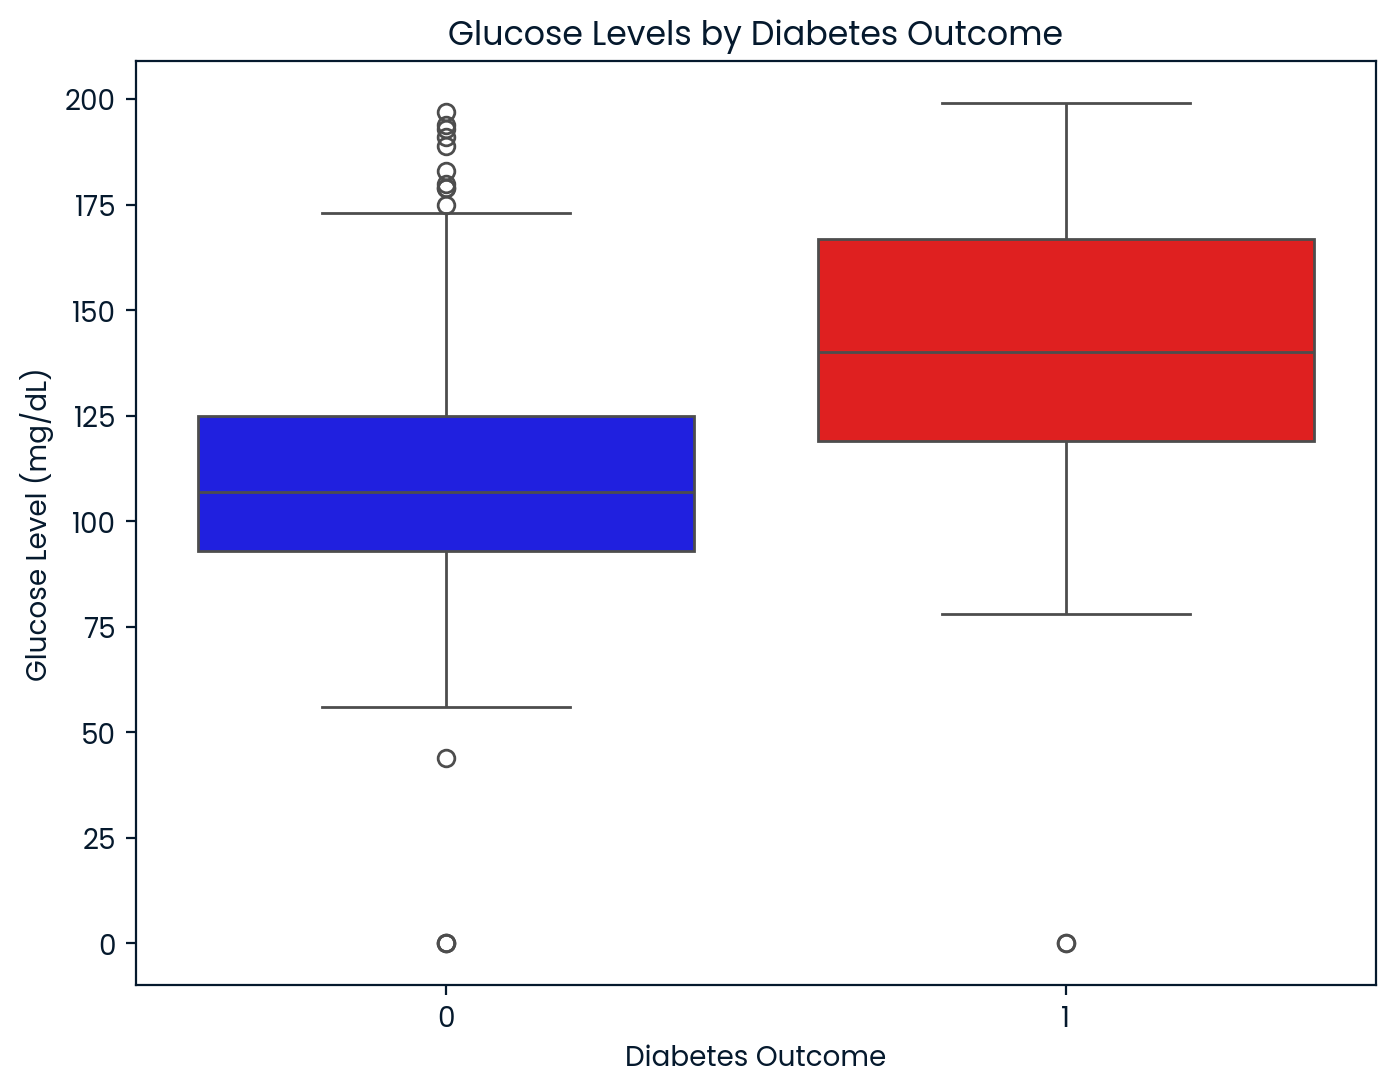

In [108]:


# Ensure 'Outcome' is treated as a categorical variable
data['Outcome'] = data['Outcome'].astype('category')

# Boxplot of Glucose levels by Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Glucose', data=data, palette=["blue", "red"])
plt.title("Glucose Levels by Diabetes Outcome")
plt.xlabel("Diabetes Outcome")
plt.ylabel("Glucose Level (mg/dL)")
plt.show()


#### Visualizing the age distribution

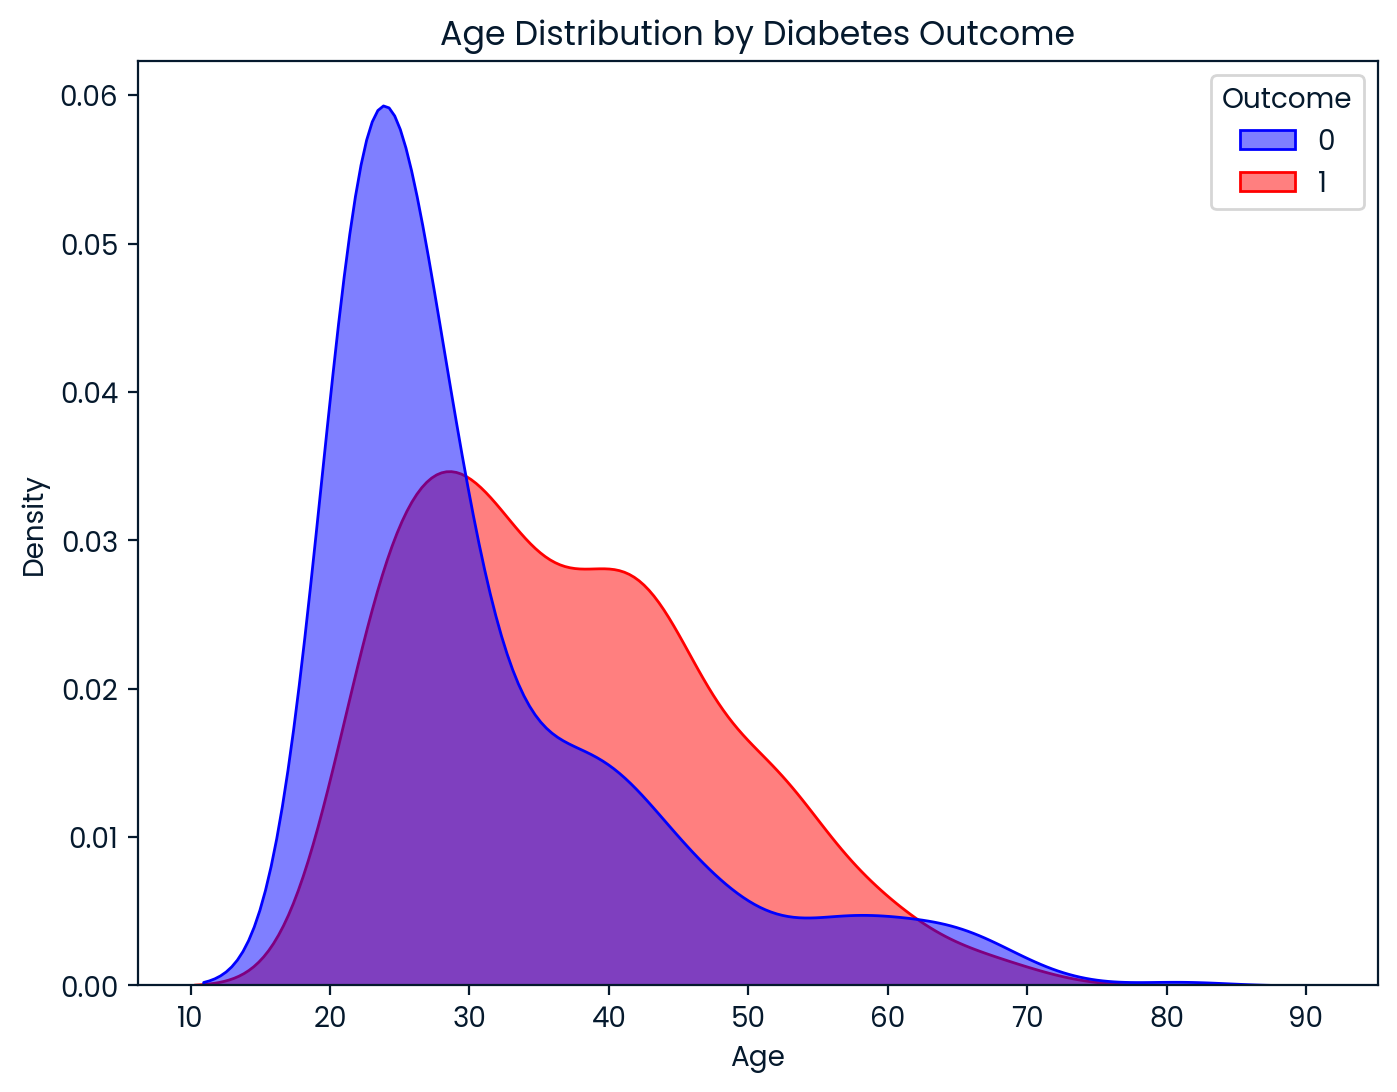

In [109]:
# Density plot of Age by Outcome
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data, x='Age', hue='Outcome', fill=True, common_norm=False, palette=["blue", "red"], alpha=0.5)
plt.title("Age Distribution by Diabetes Outcome")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()


## 💪 Competition challenge

In this challenge, you will focus on the following key tasks:

- Determine the most important factors affecting the diabetes outcome.
- Create interactive plots to visualize the relationship between diabetes and the determined factors from the previous step.
- What's the risk of a person of Age 54, length 178 cm and weight 96 kg, and Glucose levels of 125 mg/dL getting diabetes?

## Analysis of Key Determinants Influencing Diabetes Outcomes

Accuracy of the model: 0.72


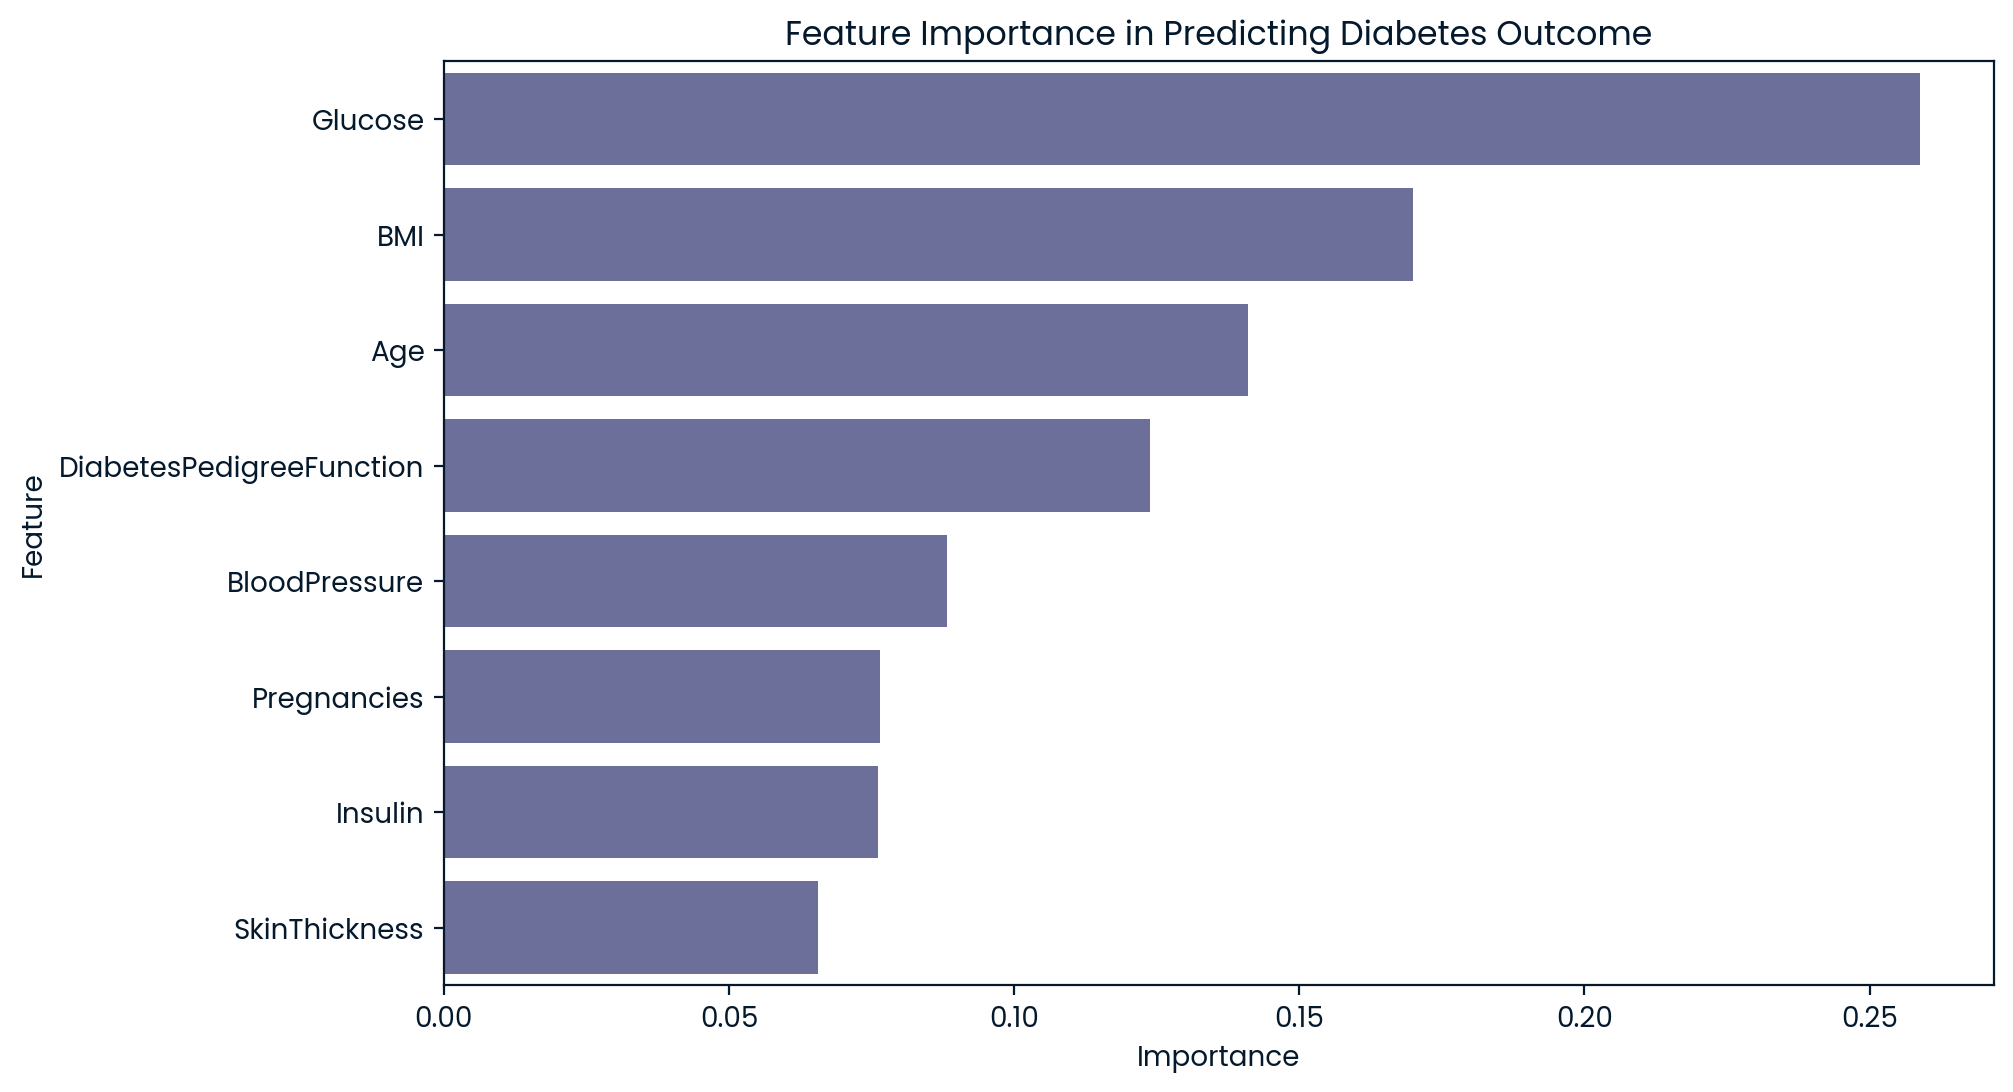

,Feature,Importance
1,Glucose,0.258864
5,BMI,0.169984
7,Age,0.140931
6,DiabetesPedigreeFunction,0.123768
2,BloodPressure,0.088134
0,Pregnancies,0.076551
4,Insulin,0.076122
3,SkinThickness,0.065646


In [110]:

# Splitting the data into features and target
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the model: {accuracy:.2f}')

# Extracting feature importance
feature_importance = model.feature_importances_
features = X.columns

# Creating a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Predicting Diabetes Outcome')
plt.show()

# Display the importance data
importance_df


The results highlight the most significant factors influencing diabetes outcomes. Glucose is the most crucial factor with an importance score of 0.258, followed by BMI at 0.169 and age at 0.140. Other notable factors include the Diabetes Pedigree Function (0.123), blood pressure (0.088), and the number of pregnancies (0.076). Insulin levels (0.076) and skin thickness (0.065) also contribute, but with less impact. These insights suggest that glucose levels and BMI are key indicators in predicting diabetes, while other variables offer moderate to minor influence.

## Analysis of Feature Importance and Visualizations for Diabetes Prediction

In [111]:
# Splitting the data into features and target
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Random Forest model to determine feature importance
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Extracting feature importance
feature_importance = model.feature_importances_
features = X.columns

# Creating a DataFrame for importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Top features based on importance
top_features = importance_df['Feature'].values[:3]  # Select top 3 features

# Visualize relationship between top features and diabetes outcome

# Scatter plot for Glucose vs BMI, colored by Outcome
fig1 = px.scatter(data, x='Glucose', y='BMI', color='Outcome',
                  title="Glucose vs BMI colored by Diabetes Outcome",
                  labels={"Outcome": "Diabetes Outcome", "Glucose": "Plasma Glucose", "BMI": "Body Mass Index"})
fig1.show()

# Box plot to compare Age distribution across Outcome
fig2 = px.box(data, x='Outcome', y='Age', color='Outcome',
              title="Age distribution across Diabetes Outcome",
              labels={"Outcome": "Diabetes Outcome", "Age": "Age of Patients"})
fig2.show()

# Histogram for Glucose levels, colored by Outcome
fig3 = px.histogram(data, x='Glucose', color='Outcome', nbins=50, marginal="rug",
                    title="Glucose Distribution Colored by Diabetes Outcome",
                    labels={"Outcome": "Diabetes Outcome", "Glucose": "Plasma Glucose"})
fig3.show()

# Scatter plot for Age vs BMI, colored by Outcome
fig4 = px.scatter(data, x='Age', y='BMI', color='Outcome',
                  title="Age vs BMI colored by Diabetes Outcome",
                  labels={"Outcome": "Diabetes Outcome", "Age": "Age of Patients", "BMI": "Body Mass Index"})
fig4.show()


- **Glucose vs BMI Colored by Diabetes Outcome**: The scatter plot reveals how plasma glucose levels and body mass index (BMI) relate to diabetes outcome. Points are color-coded to represent different outcomes (positive or negative for diabetes). This plot suggests that higher glucose levels are often associated with a positive diabetes outcome, and there is a noticeable spread in BMI across both outcomes.

- **Age Distribution Across Diabetes Outcome**: The box plot shows the age distribution of patients categorized by diabetes outcome. The distribution of age appears to vary between diabetes-positive and diabetes-negative patients. Typically, the age range for those with diabetes might be broader compared to those without, reflecting that diabetes can affect individuals at various ages.

- **Glucose Distribution Colored by Diabetes Outcome**: The histogram provides insight into the distribution of glucose levels across the diabetes outcomes. The plot, with separate colors for each outcome, highlights that glucose levels are generally higher for diabetes-positive individuals, with a distinct separation in the glucose levels between the two groups.

- **Age vs BMI Colored by Diabetes Outcome**: The scatter plot illustrates the relationship between age and BMI, colored by diabetes outcome. It helps visualize how these two features interact and their impact on diabetes. The plot may show clusters or patterns indicating that both older age and higher BMI are associated with an increased likelihood of diabetes.


Overall, the visualizations and feature importance analysis underscore the critical role of glucose levels, BMI, and age in determining diabetes outcomes. Glucose stands out as the most influential feature, while BMI and age also play significant roles in the predictive model.

## Diabetes Risk Assessment for a 54-Year-Old with Specific Physical Metrics

In [112]:

# Sample columns: "Pregnancies", "BloodPressure", "SkinThickness", "Insulin", "DiabetesPedigreeFunction"
data1 = data["Pregnancies"]
data2 = data["BloodPressure"]
data3 = data["SkinThickness"]
data4 = data["Insulin"]
data5 = data["DiabetesPedigreeFunction"]

# Store the datasets (columns) in a list
datasets = [data1, data2, data3, data4, data5]
column_names = ["Pregnancies", "BloodPressure", "SkinThickness", "Insulin", "DiabetesPedigreeFunction"]

# Initialize a list to store the results
results = []

# Loop through each dataset to calculate mean and trimmed mean
for i, column_data in enumerate(datasets):
    mean_all_values = np.mean(column_data)
    trimmed_mean = stats.trim_mean(column_data, 0.05)
    
    # Check if the current column is "DiabetesPedigreeFunction" to avoid rounding
    if column_names[i] == "DiabetesPedigreeFunction":
        # No rounding for "DiabetesPedigreeFunction"
        mean_all_values = mean_all_values
        trimmed_mean = trimmed_mean
    else:
        # Round values for other columns
        mean_all_values = round(mean_all_values)
        trimmed_mean = round(trimmed_mean)
    
    # Append results to the list
    results.append({
        "Column": column_names[i],
        "Mean value": mean_all_values,
        "Trimmed Mean (5%)": trimmed_mean
    })

# Convert the results into a DataFrame
df_results = pd.DataFrame(results)

# Display the final DataFrame
print(df_results)

                     Column  Mean value  Trimmed Mean (5%)
0               Pregnancies    4.000000           4.000000
1             BloodPressure   69.000000          71.000000
2             SkinThickness   21.000000          20.000000
3                   Insulin   80.000000          64.000000
4  DiabetesPedigreeFunction    0.471876           0.437509


To estimate the risk of diabetes for a person with specific characteristics (age, height, weight, and glucose levels), we can calculate the Body Mass Index (BMI) and use a machine learning model trained on a diabetes dataset (such as the Pima Indians Diabetes dataset) to predict the likelihood of diabetes.

1.  **Calculate BMI**: Use the formula:
   
![Screenshot_1](Screenshot_1.png)

This value indicates that the individual is in the obese category.

2. **Use a Machine Learning Model**: We'll use a RandomForestClassifier model on the Pima Indians Diabetes dataset to predict the diabetes outcome for a person with the following characteristics:
    
-    **Age**: 54 years
-    **BMI**: 30.3
-    **Glucose**: 125 mg/dL (moderately elevated)
-    **Other factors** (e.g., blood pressure, insulin) will be replaced based on previously calculated trimmed values, as they are not provided.




In [113]:

# Define features (X) and target variable (y) from the DataFrame 'data'
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] # Features
y = data['Outcome'] # Target variable

# Split the dataset into training and testing sets, with 30% of the data used for testing and 70% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the StandardScaler to standardize the feature values
scaler = StandardScaler()

# Fit the scaler to the training data and transform the training data to standardized values
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the fitted scaler (without fitting again)
X_test_scaled = scaler.transform(X_test)

# Initialize the RandomForestClassifier model with 100 decision trees (n_estimators) and a fixed random seed (random_state=42) for reproducibility
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the logistic regression model using the scaled training data
model.fit(X_train_scaled, y_train)

# Predict the target variable for the scaled testing data
y_pred = model.predict(X_test_scaled)

# Print the accuracy score of the model on the testing data
print('Accuracy:', accuracy_score(y_test, y_pred))

# Convert height (cm) and weight (kg) to BMI for a new data point
height_m = 178 / 100  # Convert height from cm to meters
weight_kg = 96
bmi = weight_kg / (height_m ** 2)

# Create a DataFrame with the new data point, using placeholder values for missing features
new_data = pd.DataFrame({
    'Pregnancies': [4],  # Number of pregnancies
    'Glucose': [125],    # Glucose level
    'BloodPressure': [71],  # Blood pressure (use trimmed mean value if missing)
    'SkinThickness': [20],  # Skin thickness (use trimmed mean value if missing)
    'Insulin': [64],       # Insulin level (use trimmed mean value if missing)
    'BMI': [bmi],          # BMI calculated above
    'DiabetesPedigreeFunction': [0.437],  # Pedigree function (use trimmed mean value if missing)
    'Age': [54]            # Age of the person
})

# Scale the new data point using the same scaler fitted on the training data
new_data_scaled = scaler.transform(new_data)

# Predict the probability of diabetes for the new data point
# Predict the diabetes outcome for the given person
risk_prediction = model.predict(new_data_scaled)
probability = model.predict_proba(new_data_scaled)[:, 1]

# Print the probability of diabetes for the new data point
print(f"Diabetes Prediction: {risk_prediction[0]} (1 = Diabetes, 0 = No Diabetes)")
print(f'The probability of diabetes for the person is: {probability[0]:.2f}')


Accuracy: 0.7575757575757576
Diabetes Prediction: 1 (1 = Diabetes, 0 = No Diabetes)
The probability of diabetes for the person is: 0.54


## Conclusion

- **Model Accuracy**: The RandomForestClassifier model achieved an accuracy of approximately 76% on the test dataset. This indicates that the model correctly predicted the outcome for about 76% of the cases, which suggests a decent level of performance.

**Predicted Probability**: For the individual with the following attributes:

- **Age**: 54 years
- **Glucose Level**: 125 mg/dL
- **BMI**: 30.4

The model predicts a 54% probability of having diabetes. This means that, given the provided features, there is a 54% likelihood that this person has diabetes, according to the model's estimation.

Summary: The RandomForestClassifier model is fairly accurate, with a reported accuracy rate of 76%. For a 54-year-old individual with a glucose level of 125 mg/dL and a BMI of 30.4, the model estimates a 54% risk of diabetes. This prediction offers a useful insight into the person’s relative risk based on the available data.